### Importando as bibliotecas principais

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Preparando os dados de teste

In [19]:
x_numpy = np.array([5,7,2,9,4,10,9,4,6,1])
y_numpy = np.array([1,1,0,1,0,1,1,0,1,0])

In [20]:
# Transofrmando os numpy arrays em tensors
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [21]:
# Reshaping os tensors
y = y.view(y.shape[0], 1)
x = x.view(x.shape[0], 1)

### Visualizando os dados de teste

torch.Size([10, 1])
torch.Size([10, 1])


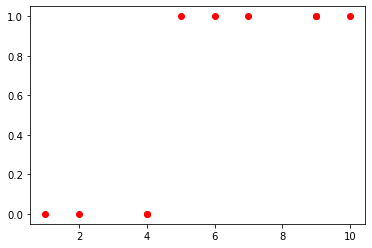

In [22]:
print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')

### Classe de Regressão Logística

In [23]:
class RegressaoLogistica(nn.Module):
  def __init__(self, n_input, n_output):
    super(RegressaoLogistica, self).__init__()
    self.Linear = nn.Linear(n_input, 1)

  def forward(self, x):
    y_hat = torch.sigmoid(self.Linear(x))
    return y_hat

### Definições do modelo

In [24]:
input_size = 1
output_size = 1
model = RegressaoLogistica(1,1)

### Definição da Função de custo e Otimizador

In [25]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print (model.parameters())

<generator object Module.parameters at 0x00000206BD018AC0>


### Loop de treinamento

In [26]:
num_epochs = 2000
contador_custo = []
for epoch in range(num_epochs):
  # Forward pass and loos
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)
  # Backward pass (calcular gradientes)
  loss.backward()
  # Update (atualizar os pesos)
  optimizer.step()
  if (epoch+1)%10 == 0:
      print("===============================")
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('m: {:.5f}'.format(model.Linear.weight.data.detach().item()))
      print('m (gradiente): {:.5f}'.format(model.Linear.weight.grad.detach().item()))
      print('b: {:.5f}'.format(model.Linear.bias.data.detach().item()))
      print('b (gradiente): {:.5f}'.format(model.Linear.bias.grad.detach().item()))
    
  # Limpar o otimizador
  optimizer.zero_grad()


6757
b (gradiente): 0.12867
Epoch:  629
Custo: 0.46014809608459472656
m: 0.28281
m (gradiente): -0.02075
b: -0.48040
b (gradiente): 0.12814
Epoch:  639
Custo: 0.45846971869468688965
m: 0.28489
m (gradiente): -0.02068
b: -0.49319
b (gradiente): 0.12760
Epoch:  649
Custo: 0.45680528879165649414
m: 0.28695
m (gradiente): -0.02061
b: -0.50592
b (gradiente): 0.12707
Epoch:  659
Custo: 0.45515456795692443848
m: 0.28901
m (gradiente): -0.02055
b: -0.51860
b (gradiente): 0.12654
Epoch:  669
Custo: 0.45351749658584594727
m: 0.29106
m (gradiente): -0.02048
b: -0.53122
b (gradiente): 0.12602
Epoch:  679
Custo: 0.45189389586448669434
m: 0.29310
m (gradiente): -0.02042
b: -0.54380
b (gradiente): 0.12549
Epoch:  689
Custo: 0.45028361678123474121
m: 0.29514
m (gradiente): -0.02035
b: -0.55632
b (gradiente): 0.12497
Epoch:  699
Custo: 0.44868659973144531250
m: 0.29717
m (gradiente): -0.02029
b: -0.56879
b (gradiente): 0.12446
Epoch:  709
Custo: 0.44710272550582885742
m: 0.29920
m (gradiente): -0.02022

### Plotando o gráfico da Função de Custo

GRÁFICO DA FUNÇÃO DE CUSTO


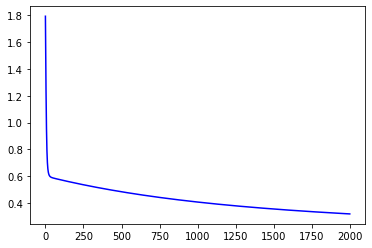

In [27]:
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

### Fazendo a prefição

In [28]:
teste = np.array([2, 3, 6, 7, 8])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

with torch.no_grad():
  predicoes = model(t_teste)
  for x, y in zip(t_teste, predicoes):
    #definindo o cutoff / threshold
    status = ""
    if (y >= 0.7):
      status = "aprovado"
    else:
      status = "reprovado"
    print ('x: {:.2f} | ŷ: {:.2f} | '.format(x.detach().item(),y.detach().item()), status)

x: 2.00 | ŷ: 0.31 |  reprovado
x: 3.00 | ŷ: 0.43 |  reprovado
x: 6.00 | ŷ: 0.78 |  aprovado
x: 7.00 | ŷ: 0.85 |  aprovado
x: 8.00 | ŷ: 0.91 |  aprovado
